# Rossmann Sales Forescast

## 0.0. Imports

In [1]:
import pandas as pd
import inflection
import math

import seaborn as sns

from IPython.core.display import HTML

### 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container{width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
jupyter_settings()  

Populating the interactive namespace from numpy and matplotlib


### 0.2 Loading data
Font of dataset <a href="https://www.kaggle.com/c/rossmann-store-sales/data">Kaggle Rossmann Dataset</a> and dictionary about colomns

In [3]:
# loading datasets file
df_sales_raw = pd.read_csv("dataset/train.csv")
df_store_raw = pd.read_csv("dataset/store.csv")

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how="left", on='Store')

/home/python/PycharmProjects/Projects/rossmann_sales_forecast/venv_rossmann/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1.0. Data Description

In [4]:
# copy data from original data
df1 = df_raw.copy()

### 1.1. Rename Columns

In [5]:
# get the name of columns
cols_old = df1.columns

See the documentation the <a href="https://inflection.readthedocs.io/en/latest/">Inflection Snakecase</a>

In [6]:
# transform snakecase with inflection
snakecase = lambda x: inflection.underscore(x)
cols_new = map(snakecase, cols_old)
# replace the columns
df1.columns = cols_new

### 1.2. Data Dimensions

In [7]:
# See the dimensions to know if we have a computing enough to run
print(f"Number of Rows: {df1.shape[0]}")
print(f"Number of Columns: {df1.shape[1]}")

# In this case ok, my computer can run

Number of Rows: 1017209
Number of Columns: 18


### 1.3. Data Types 

In [8]:
# See types of each data and if will be necessary converting or not
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [9]:
# this case we have columns
# date = object (must be datetime)
# competition_open_since_year = float -> int
# competition_open_since_month = float -> int
# promo2_since_week = float -> int

# It's not possible convert to int because there are NaN, first let's fillna, after I will chage types
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# only we will change it's data, because we must have date form to replace NaN the others columns

# date from object to datetime
df1['date'] = pd.to_datetime(df1.date).copy()

In [11]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
279198,889,7,2014-11-16,0,0,0,0,0,0,d,a,18670.0,12.0,2005.0,0,NaN,NaN,NaN
744274,240,1,2013-09-02,4529,455,1,0,0,0,a,a,1110.0,5.0,2009.0,0,NaN,NaN,NaN
761408,649,7,2013-08-18,0,0,0,0,0,0,a,a,14570.0,11.0,2002.0,0,NaN,NaN,NaN
244726,1034,2,2014-12-23,11806,1227,1,0,0,1,a,a,13750.0,4.0,2015.0,0,NaN,NaN,NaN
342944,1084,2,2014-09-09,5375,740,1,0,0,0,a,a,190.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4. Check NaN 

In [13]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5. Fillout NaN

#### 1.5.0 Review

    competition_distance
    If the competitors is nan, maybe there aren't competitors closer, others words, they are so far a way, well, 
    this case make a sence replace the value up the max value it's the same, but with values
        max() == 75860.0 I will replace to 200000.0

    competition_open_since_month
    competition_open_since_year
    promo2_since_week
    promo2_since_year
        This options above we will get from date the year, month and week to try the first solution, because
        there are many NaN and we will replace from date
        
    promo_interval
        If this columns there are informations, it's mean that the store joined the promo2 else if this columns
        is empt mean that the store not joined the promotion2, it's means if I make a comparation, between 
        promo_interval and month from date, when if month contain in promo_interval mean promo2 == 1 else 
        promo2 == 0

#### 1.5.1. competition_distance

In [14]:
# Getting the max value from columns
max_value = df1['competition_distance'].max()
# calculate base on 200000.0 to automate % and rounded to up
val_repl_comp_dist = round(
    ((((200000.0 - max_value) / max_value) + 1) * max_value))
# replace the NaN to 200000.0 or defaut % up from max()
df1['competition_distance'] = df1['competition_distance'].fillna(
    val_repl_comp_dist)

In [15]:
# this way it's harder than fillna() and lesser performance
    # df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) == True else x)

##### Question:
    Meigaton, Why didn't you use fillna() than lambda+math+apply ?
              fillna() == 15ms
    lambda+math+apply == 261ms

#### 1.5.2. competition_open_since_month 
    competition_open_since_year
    promo2_since_week
    promo2_since_year

In [16]:
# Second Cycle
# the solution that Meigaron had it's not a ideal, because if you seeing the index == 522152 bellow
# see that imagine if competition had been NaN, the data is:
#  	 date    	day_of_week 	competition_open_since_month 	competition_open_since_year 	promo2_since_week 	promo2_since_year
# 2014-03-20  	    4       	           3.0              	         2014.0             	       3.0      	     2014
# as you see, all diferent from the real, but to first solution, we will be try, after we will try other way

# see at bellow code
#df1[['date', 'day_of_week', 'competition_open_since_month', 
#    'competition_open_since_year', 'promo2_since_week', 
#    'promo2_since_year']][df1.index == 522152]

In [17]:
# replacing the NaN with day, week, month and year from date, it's suppose to date
# is beggining the competition between sotores

# competition_open_since_month
df1['competition_open_since_month'] = df1[
    'competition_open_since_month'].fillna(df1.date.dt.month)

# competition_open_since_year
df1['competition_open_since_year'] = df1[
    'competition_open_since_year'].fillna(df1.date.dt.year)

# promo2_since_week
df1['promo2_since_week'] = df1['promo2_since_week'].fillna(
    df1.date.dt.dayofweek)

# promo2_since_year
df1['promo2_since_year'] = df1['promo2_since_year'].fillna(
    df1.date.dt.year)

#### 1.5.7. promo_interval

In [18]:
# this map is to replace number to your value, exemple, 2:'Feb' where has the number 2 will be replace to 'Feb'
month_map = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
# replace number to month name with map()
df1['month_map'] = df1['date'].dt.month.map(month_map)

# replace the NaN to zero "0" at the column promo_interval
df1['promo_interval'].fillna(0, inplace=True)

# run each line and it's verify if month_map contains in promo_interval
# return 1 to new columns ['is_promo']
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(
    lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in
    x['promo_interval'].split(',') else 0, axis=1)

In [19]:
# Second Cycle

# df1.sample(10)
# first of all we will replace the promo_interval to number or..
# create a new column with month name and compare

# this head will be to view a comparation before than after alteration and see if run
#df1.head(20)

# see if the value in month_map contains in promo_interval if is true than replace promo2 to 1 else
# replace to 0
#df1['is_promo'] = df1[['promo2', 'promo_interval', 'month_map']].apply(
#    lambda x: 1 if x['promo2'] == 1 else 1 if x['month_map'] in str(x['promo_interval']).split(',') else 0, axis=1)

# this is the next cycle, because I think that the Meigaron Ideia it's not right, but we will run the way
# from him and after run this solution and compere the score between them.
#df1[['date', 'promo', 'promo2', 'promo2_since_year', 
#     'promo_interval', 'month_map', 'is_promo']][df1.index == 12]

### 1.6. Change Types

In [20]:
# convert object to integer
df1['competition_open_since_month'] = df1[
    'competition_open_since_month'].astype(int)

# convert object to integer
df1['competition_open_since_year'] = df1[
    'competition_open_since_year'].astype(int)

# convert object to integer
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)

# convert object to integer
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.5. Descriptive Statistical

In [21]:
# Slicing datatype by numerical and categorical data, first of all we need see dtypes

# to show kind of dtypes
df1.dtypes.value_counts()

int64             13
object             5
datetime64[ns]     1
float64            1
dtype: int64

In [22]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(
    exclude=['int64', 'float64', 'datetime64[ns]'])

#### 1.5.1 Numerical

In [23]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
day_of_week,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
school_holiday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
competition_distance,1017209.0,5935.442677,12547.652996,20.0,710.0,2330.0,6910.0,200000.0
competition_open_since_month,1017209.0,6.786849,3.311087,1.0,4.0,7.0,10.0,12.0
competition_open_since_year,1017209.0,2010.324840,5.515593,1900.0,2008.0,2012.0,2014.0,2015.0


In [24]:
# Central Tendency - mean, median
ct_mean = pd.DataFrame(num_attributes.mean())
ct_median = pd.DataFrame(num_attributes.median())

In [25]:
# Dispersion - std, min, max, range, skew, kurtosis

d_std = pd.DataFrame(num_attributes.std())
d_min = pd.DataFrame(num_attributes.min())
d_max = pd.DataFrame(num_attributes.max())
d_range = pd.DataFrame(d_max - d_min)
d_skew = pd.DataFrame(num_attributes.skew())
d_kurtosis = pd.DataFrame(num_attributes.kurtosis())

In [26]:
# Concatenation Metrics
metrics = pd.concat(
    [d_min, d_max, d_range, ct_mean, ct_median, d_std, d_skew, d_kurtosis],
    axis=1).reset_index()

metrics.columns = [
    'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew',
    'kurtosis'
]

In [27]:
metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908651,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997391,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.926175,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411734,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485759,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.652996,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311087,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515593,-7.235657,124.071304


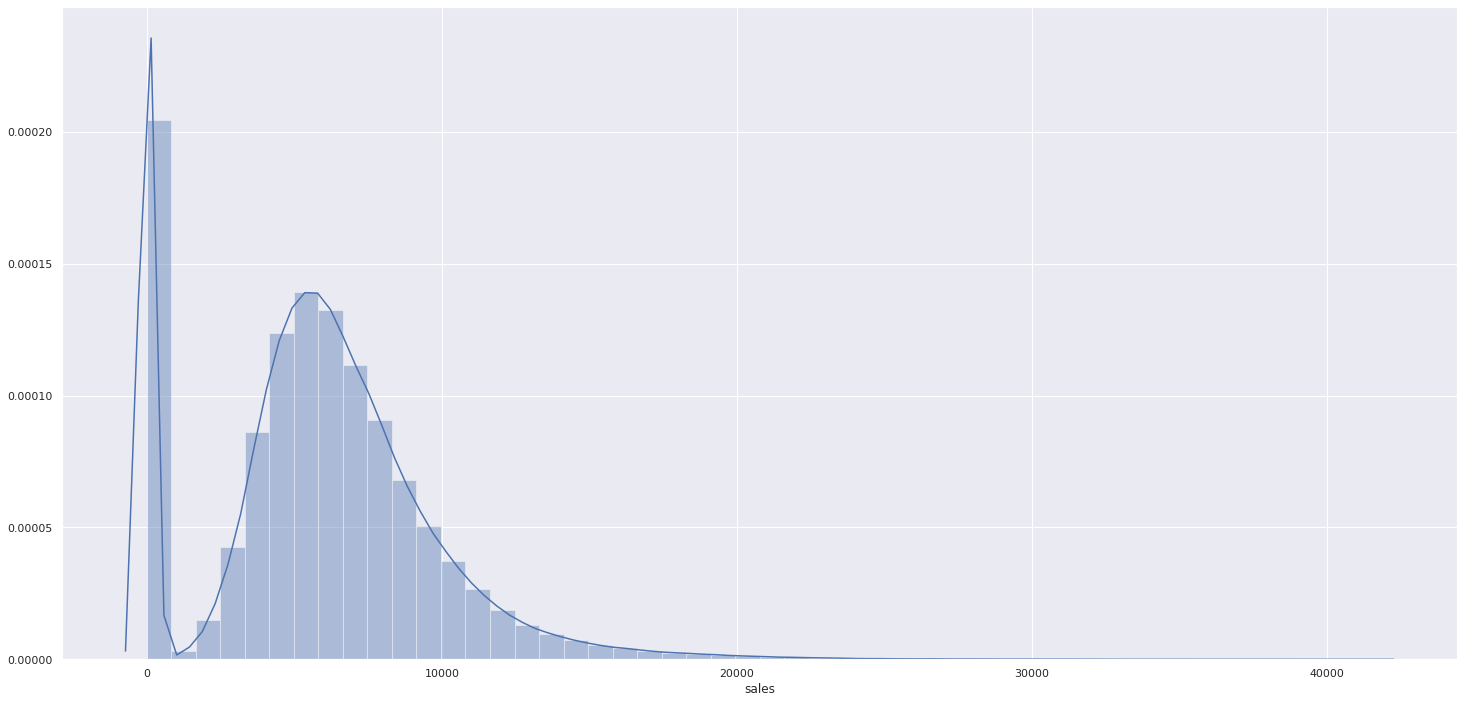

In [28]:
# Sales Distribution
sns.distplot(df1['sales'])

# as you see the most of volum of sales it's closer of zero, why?

#### 1.5.2 Categorical

In [29]:
cat_attributes.describe(include='all')

,state_holiday,store_type,assortment,promo_interval,month_map
count,1017209,1017209,1017209,1017209,1017209
unique,5,4,3,4,12
top,0,a,a,0,Mar
freq,855087,551627,537445,508031,103695


In [67]:
#sns.boxplot(x='state_holiday', y='sales', data=df1)
# as you see that's impossible understand something, probably because the range it's so long and there are
# a "0" in the state_holiday, it's possible in that state_holiday==0 is close store, let's get off the 0

In [37]:
aux_filt_sh = df1[(df1['state_holiday'] != 0)&(df1['state_holiday'] != '0')]                 

In [62]:
#sns.boxplot(x='state_holiday', y='sales', data=aux_filt_sh)

# this case it's not solve the problem because the sales it's most closer at '0', in this case I think one solution is
# do filter when take above '0' otherwords up of zero it's like a (sale > zero), let's try

count of each


a    694
b    145
c     71
Name: state_holiday, dtype: int64

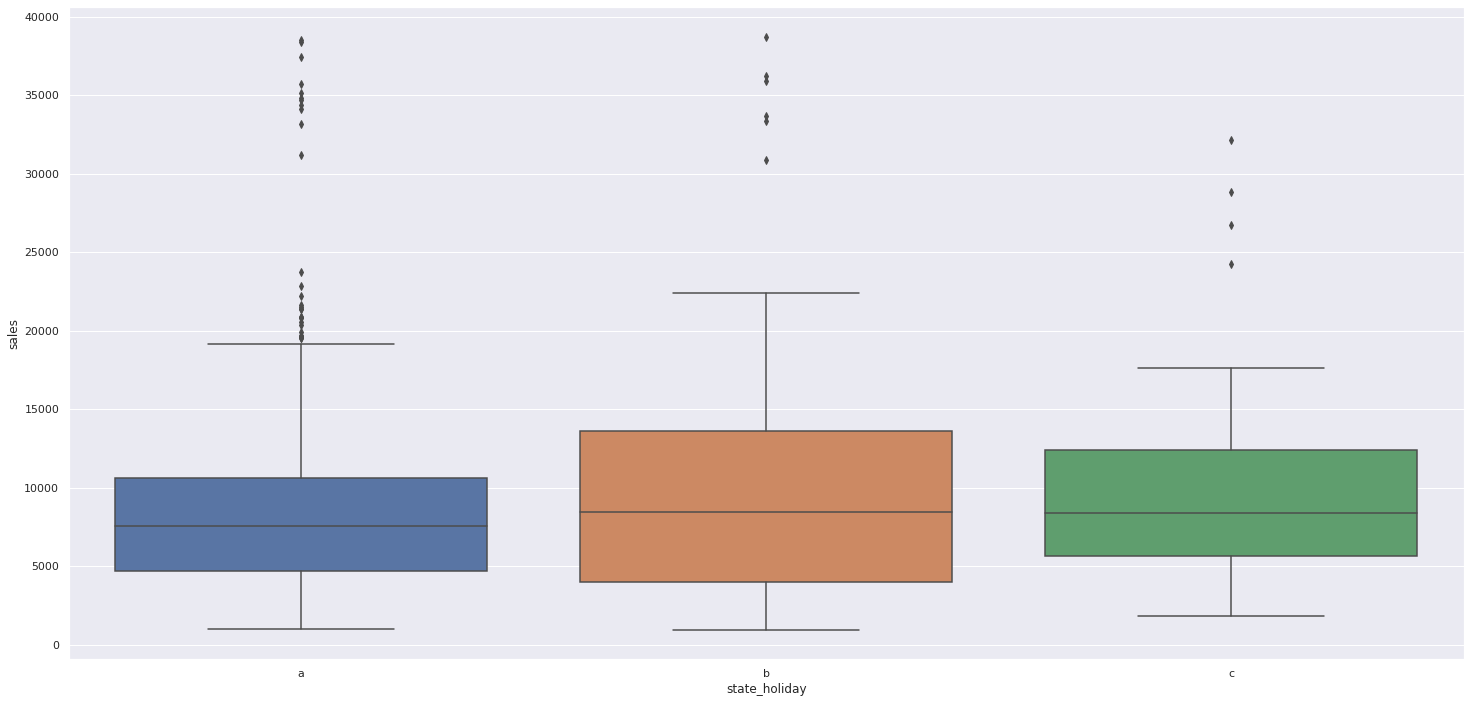

In [66]:
sns.boxplot(x='state_holiday', y='sales', data=aux_filt_sh[aux_filt_sh.sales > 0])
print('count of each')
aux_filt_sh['state_holiday'][aux_filt_sh.sales > 0].value_counts()

# OK! that's right now, but let's compare the others categorical columns

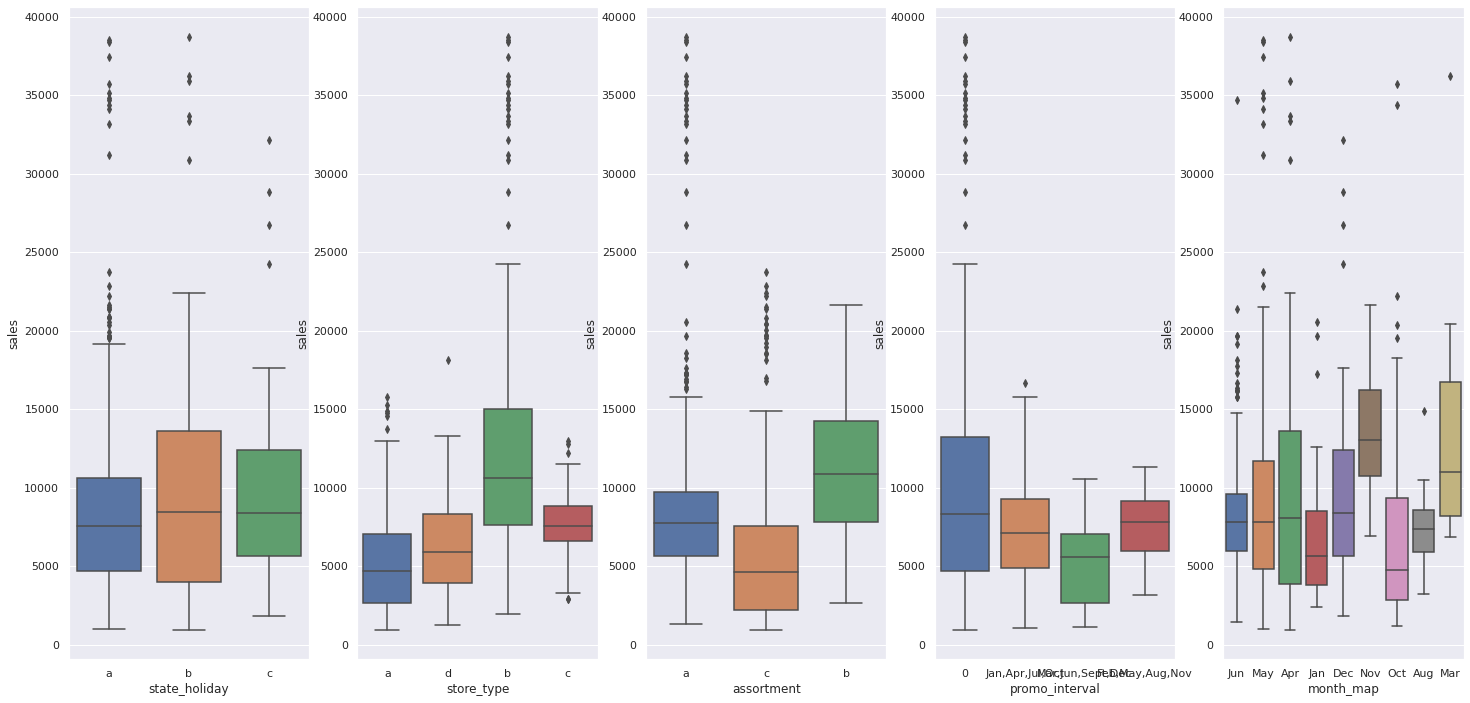

In [59]:
# plotting filtering only holidays, otherwords, nothing a normal days and sales up than zero (sales > 0)
cont = 1
for cat in cat_attributes.head():
    plt.subplot(1, cat_attributes.shape[1], cont)
    sns.boxplot(x=cat, y='sales', data=aux_filt_sh[aux_filt_sh.sales > 0])
    cont += 1

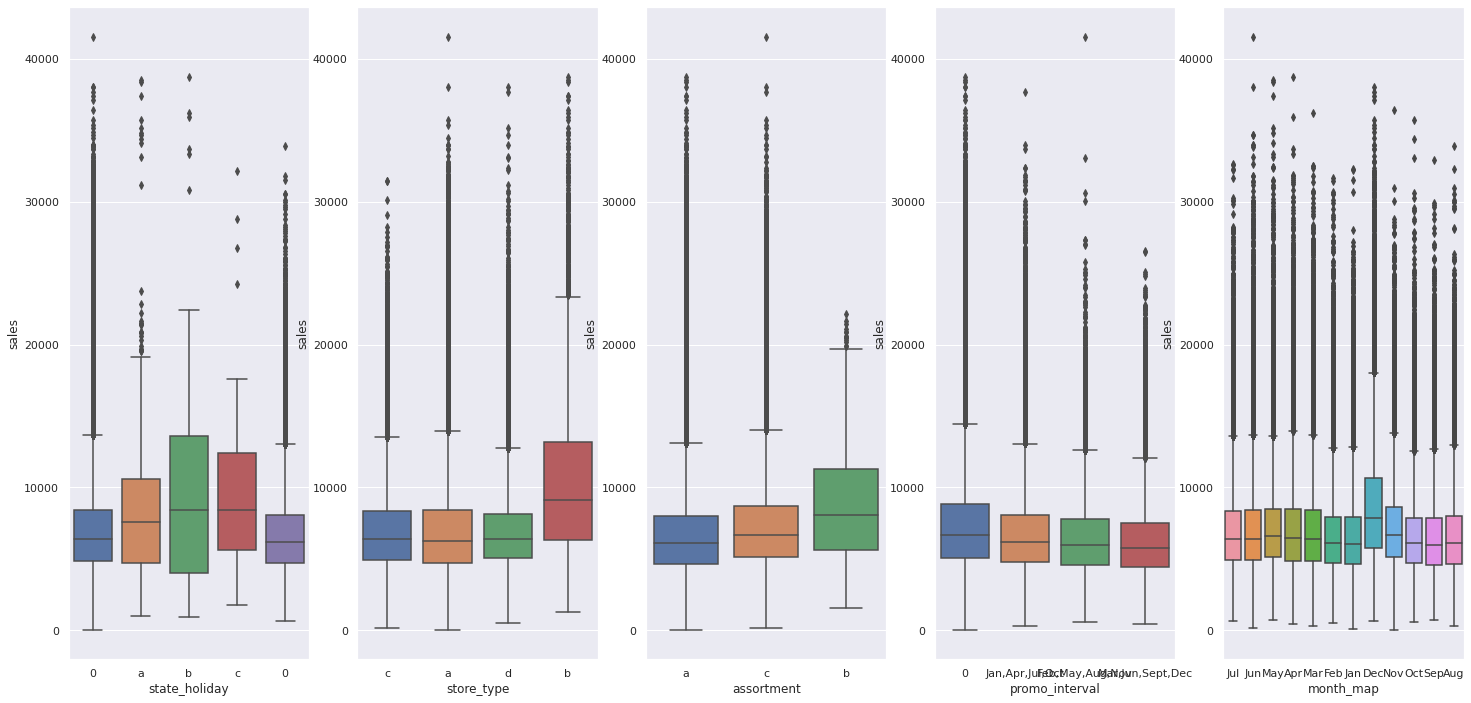

In [63]:
# Let's see bellow the total data to compare with only holidays above ^
cont = 1
for cat in cat_attributes.head():
    plt.subplot(1, cat_attributes.shape[1], cont)
    sns.boxplot(x=cat, y='sales', data=df1[df1['sales'] > 0])
    cont += 1